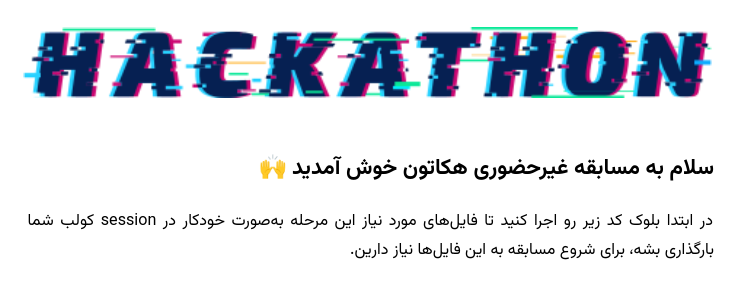

In [35]:
!pip install -q gdown
!pip install pandas
!pip install numpy
!pip install scikit-learn
!pip install imblearn

^C



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import gdown

file_id = "1NZUxu5y7p6nVWcFtsNMzKr9zG84u4L3F"
gdown.download(f"https://drive.google.com/uc?id={file_id}", "netflow_hackathon_datasets.zip", quiet=True)
!unzip "/content/netflow_hackathon_datasets.zip" > /dev/null 2>&1
!mv -f "/content/anomaly detection final" "/content/datasets" > /dev/null 2>&1
!rm "/content/netflow_hackathon_datasets.zip" > /dev/null 2>&1

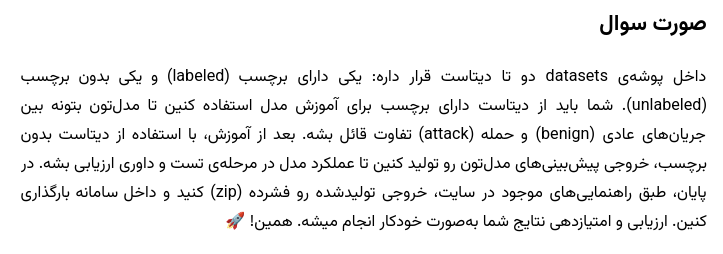

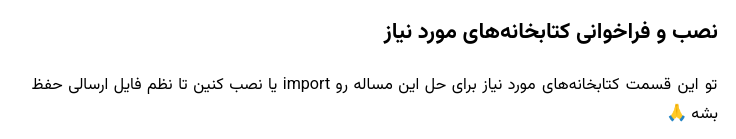

In [ ]:
# task 1: install and import libs and packages here

In [36]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix



---



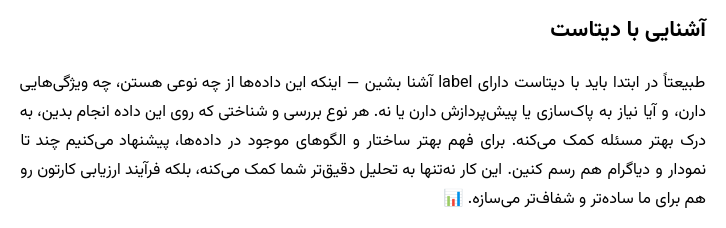

In [37]:
# task 2: get familiar with the labled dataset

In [38]:
df = pd.read_csv('./netflow_hackathon_datasets/anomaly detection final/labeled_dataset.csv')
df.head()

,Unnamed: 0,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Fwd Packets Length Total,Bwd Packets Length Total,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Class
0,271174,17,449,98,0,42832.0,0.0,440.0,296.0,437.06122,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DrDoS_NTP,Attack
1,24038,6,16696066,8,6,48.0,36.0,6.0,6.0,6.00000,...,499965.0,706911.6,999827.0,103.0,7848067.5,1628737.8,8999759.0,6696376.0,Syn,Attack
2,44954,17,3008437,4,0,2064.0,0.0,516.0,516.0,516.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TFTP,Attack
3,53199,17,3112318,4,0,2064.0,0.0,516.0,516.0,516.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TFTP,Attack
4,8940,17,215106,6,0,2088.0,0.0,393.0,321.0,348.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UDP,Attack


In [39]:
df.columns

Index(['Unnamed: 0', 'Protocol', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Fwd Packets Length Total',
       'Bwd Packets Length Total', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Packet Length Min', 'Packet Length Max', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN Flag Co



---



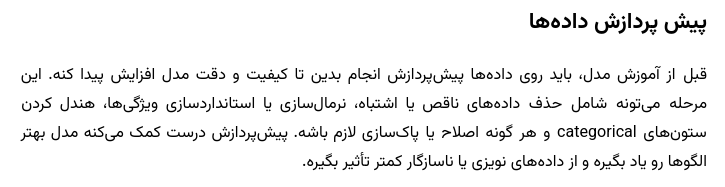

In [ ]:
# task 3: preprocess and prepare data before getting to the training section

In [40]:
df.drop(columns=['Unnamed: 0', 'Label'], inplace=True)


In [41]:
df.isnull().sum()

Protocol                    0
Flow Duration               0
Total Fwd Packets           0
Total Backward Packets      0
Fwd Packets Length Total    0
                           ..
Idle Mean                   0
Idle Std                    0
Idle Max                    0
Idle Min                    0
Class                       0
Length: 78, dtype: int64

In [42]:
df = df.loc[:, (df != 0).any(axis=0)]

In [43]:
df = df.loc[:, df.nunique() > 1]

In [44]:
df['Class'].value_counts()


Class
Attack    77240
Benign    22760
Name: count, dtype: int64



---



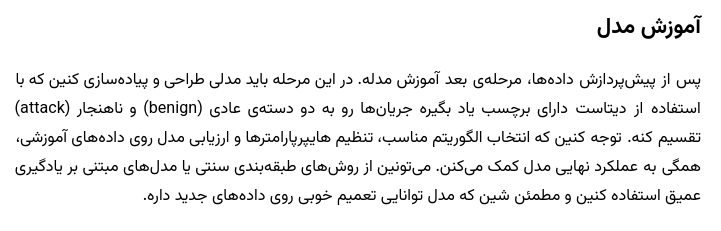

In [ ]:
# tak 4: train the model

In [45]:
X = df.drop('Class', axis=1)
y = df['Class'].map({'Benign': 0, 'Attack': 1})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)


In [46]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train_res, y_train_res)

y_pred = model.predict(X_test)




---



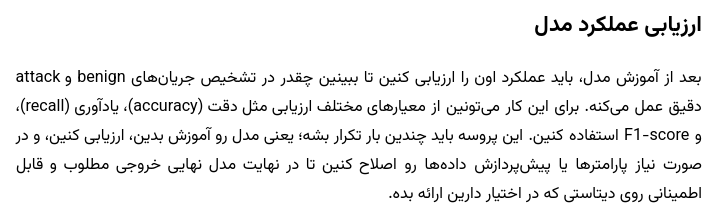

In [ ]:
# task 5: model evaluation

In [47]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4543
           1       1.00      1.00      1.00     15457

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000

[[ 4539     4]
 [   15 15442]]




---



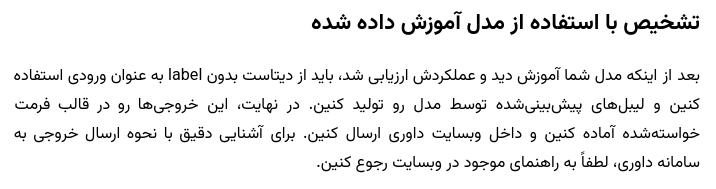

In [ ]:
# task 6: predict lables

In [48]:
new_df = pd.read_csv("./netflow_hackathon_datasets/anomaly detection final/unlabeled_dataset.csv")
new_df.head()

,Unnamed: 0,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Fwd Packets Length Total,Bwd Packets Length Total,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,...,Fwd Act Data Packets,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,271174,17,449,98,0,42832,0,440,296,437.06122,...,97,20,0.0,0.0,0,0,0.0,0.0,0,0
1,24038,6,16696066,8,6,48,36,6,6,6.00000,...,7,20,499965.0,706911.6,999827,103,7848067.5,1628737.8,8999759,6696376
2,44954,17,3008437,4,0,2064,0,516,516,516.00000,...,3,-1,0.0,0.0,0,0,0.0,0.0,0,0
3,53199,17,3112318,4,0,2064,0,516,516,516.00000,...,3,20,0.0,0.0,0,0,0.0,0.0,0,0
4,8940,17,215106,6,0,2088,0,393,321,348.00000,...,5,20,0.0,0.0,0,0,0.0,0.0,0,0


In [49]:
if 'Unnamed: 0' in new_df.columns:
    new_df.drop('Unnamed: 0', axis=1, inplace=True)

In [50]:
new_df.drop(columns=set(new_df.columns) - set(X_train_res.columns),inplace=True)

In [51]:
set(new_df.columns) - set(X_train_res.columns)

set()

In [52]:
new_df = new_df[X_train_res.columns]
new_df = new_df.fillna(0)

new_pred = model.predict(new_df)

predicted_labels = pd.Series(new_pred).map({0: 'Benign', 1: 'Attack'})


In [53]:
print(predicted_labels.value_counts())
print(predicted_labels.head())

Attack    3875
Benign    1125
Name: count, dtype: int64
0    Attack
1    Attack
2    Attack
3    Attack
4    Attack
dtype: object


In [54]:
df_output = pd.DataFrame(data={'label':predicted_labels})
df_output

,label
0,Attack
1,Attack
2,Attack
3,Attack
4,Attack
...,...
4995,Benign
4996,Benign
4997,Attack
4998,Attack


In [55]:
df_output.to_csv('./predictions.csv' , index=False)